In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plp
import pickle
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

In [5]:
df = pd.read_csv('./heart.csv')
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [6]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [7]:
df.dtypes

age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
output        int64
dtype: object

In [8]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


<Axes: >

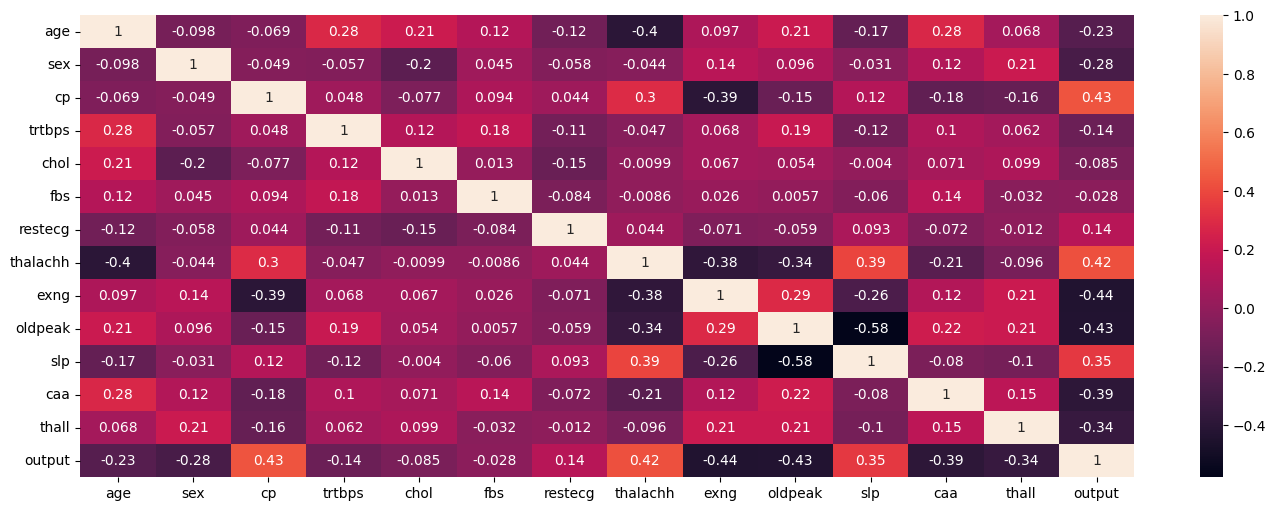

In [9]:
plp.figure(figsize= (17,6))
sns.heatmap(df.corr(),annot = True)

In [10]:
df['sex'].value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [11]:
df['output'].value_counts()

output
1    165
0    138
Name: count, dtype: int64

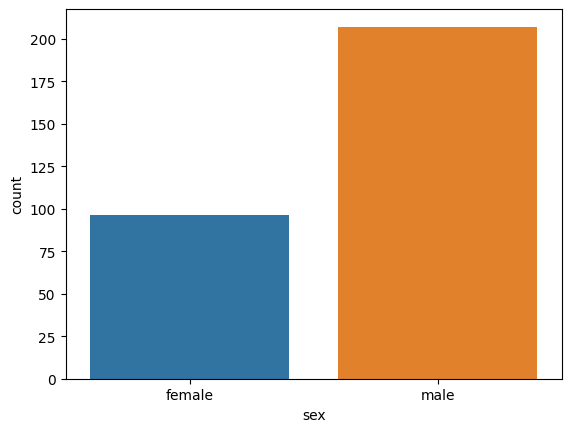

In [12]:
sns.countplot(x = 'sex', data = df)
plp.xticks([0,1],['female','male'])
plp.show()

<function matplotlib.pyplot.show(close=None, block=None)>

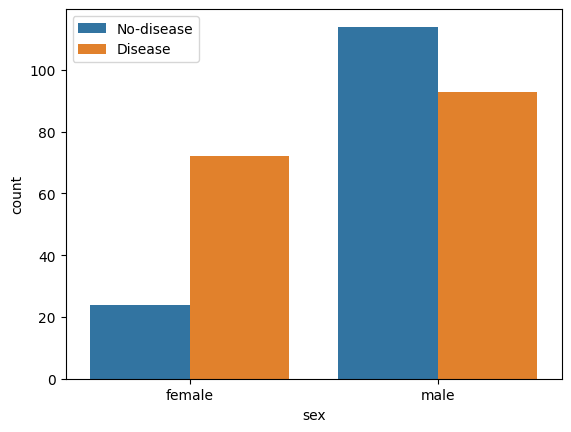

In [13]:
sns.countplot(x='sex',hue="output", data = df)
plp.xticks([1,0],['male','female'])
plp.legend(labels=['No-disease','Disease'])
plp.show

In [14]:
x= df.drop("output", axis=1)
y= df["output"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state =1)


In [15]:
model = DecisionTreeClassifier()
model.fit(x_train, y_train)

result = model.predict(x_test)
result

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1], dtype=int64)

In [16]:
result = model.predict(x_test)
print('Accuracy score : ',accuracy_score(result,y_test))

Accuracy score :  0.6967213114754098


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

model = LogisticRegression()

# Membuat instance dari KFold untuk cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Menggunakan cross_val_score untuk melakukan cross-validation
scores = cross_val_score(model, x, y, cv=kfold, scoring='accuracy')

# Menampilkan hasil cross-validation
print("Hasil Cross-Validation:")
print(scores)
print("Rata-rata Akurasi: %.2f" % scores.mean())